In [ ]:
#Rachael Doyle

#1. What type of algorithm would you use to segment a company customers database into multiple groups?
        #k means clustering
    
#2. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem? Explain.
    #Supervised, because there are two target variables it could get labeled into, spam or not spam
    
#3.What is a test set, and why would you want to use it?
    # a test set is the data after being split that we are using to quantify the performace, and evaluate how well the model ran. We use this to see how 
    # accurate the model is after running it on the training set. 
    
#4.E


In [4]:
#5 a
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np 

s3 = boto3.resource('s3')
bucket_name = "rachaeld-data445"
bucket = s3.Bucket(bucket_name)

file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#reading the data-file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
#5c
from sklearn.model_selection import train_test_split

# defining the input and target
X = house_price.drop(columns = 'house_price_of_unit_area', axis = 1)
Y = house_price['house_price_of_unit_area']

# splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2)


In [8]:
#5d
from sklearn.linear_model import LinearRegression

# building the linear model 
lm_md = LinearRegression().fit(X_train, Y_train)

# predicting on test
lm_pred = lm_md.predict(X_test)
lm_pred


array([42.61128074, 41.38078212, 45.48807528, 46.10966712, 43.08400841,
       38.09483809, 40.09430419, 40.32563439, 43.35811021, 29.93352166,
       30.45881765, 46.85078453, 37.95090156,  8.42560275, 12.17384585,
       30.78292373, 41.13531279, 39.18097484, 45.28363183, 33.74182096,
       29.57376721, 12.70518753, 41.41164415, 32.97173474, 42.80676695,
       38.41462493, 46.10689173, 40.73231033, 42.97783489, 32.47481006,
       47.66296161, 48.49842535, 45.30410726, 32.30826499, 42.44361789,
       38.38858205, 40.02900884, 31.7187608 , 30.19838884, 54.22363667,
       36.10292828, 29.6402454 , 49.44513889, 31.51010323, 48.84342415,
       44.61679963, 32.9446951 ,  8.37351699, 43.67141882, 41.3722832 ,
       30.94663678, 15.52153937, 31.44086973, 38.94219289, 46.29110263,
       46.02876309, 32.80404331, 15.3315464 , 28.85356776, 46.02876309,
       52.18766161, 42.15195915, 45.51615439, 28.46299354, 48.56949431,
       44.08410481, 32.35165914, 24.75988433, 38.75766963, 44.30

In [9]:
# computing the mse
np.mean((Y_test - lm_pred)**2)

40.9075972187858

In [10]:
#5e
from sklearn.model_selection import train_test_split

# defining the input and target
X2 = house_price.drop(columns = ['house_price_of_unit_area', 'distance_to_the_nearest_MRT_station'], axis =1)
Y2 = house_price['house_price_of_unit_area']

# splitting the data
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2,Y2, test_size = .2)

# building the model
lm_md2 = LinearRegression().fit(X_train2, Y_train2)

# predicting on test
lm_pred2 = lm_md2.predict(X_test2)
lm_pred2

array([34.8984247 , 39.82280519, 37.78251309, 49.39882623, 39.8234243 ,
       38.63181397, 35.654099  , 47.84691615, 35.45000309, 32.96772048,
       45.14598587, 50.6345108 , 47.80629337, 20.5146335 , 49.39882623,
       31.75320829, 39.60342885, 41.53319281, 51.64463156, 35.28406594,
       36.91700056, 36.1355265 , 50.61079747, 40.25712936, 47.26806654,
       38.2863983 , 42.16729811, 46.54770925, 43.34453741, 29.6679172 ,
       45.5565555 , 41.85761574, 31.66338522, 15.16216958, 16.89379762,
       47.97495713, 48.68716052, 17.2956043 , 31.33546863, 46.29837239,
       41.92205007, 42.20141902, 13.98082567, 48.58094379, 36.11098784,
       33.94166601, 29.2818857 , 30.07263834, 30.42312089, 31.29791443,
       33.96822019, 42.93475332, 48.60688091, 49.58470552, 16.91763665,
       28.33630972, 31.28303816, 42.34666173, 33.96822019, 36.08241813,
       34.41438993, 39.19789709, 36.41540358, 49.85861206, 41.36477693,
       48.24467134, 31.388577  , 48.91117072, 30.37185584, 36.12

In [11]:
# computing the mse
np.mean((Y_test2 - lm_pred2)**2)

65.36470646378866

In [ ]:
#5f
    # I would use model 1 , this is because it has a smaller MSE value. 

In [20]:
#5g
md1results = list()
md2results = list()
for i in range(0,100):
    # defining the input and target
    X = house_price.drop(columns = 'house_price_of_unit_area', axis = 1)
    Y = house_price['house_price_of_unit_area']

    # splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2)

    lm_md = LinearRegression().fit(X_train, Y_train)

    # predicting on test
    lm_pred = lm_md.predict(X_test)
    lm_pred
    #mean mse
    md1results.append(np.mean((Y_test - lm_pred)**2))
    
    #### model 2
    # defining the input and target
    X2 = house_price.drop(columns = ['house_price_of_unit_area', 'distance_to_the_nearest_MRT_station'], axis =1)
    Y2 = house_price['house_price_of_unit_area']

    # splitting the data
    X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2,Y2, test_size = .2)

    # building the model
    lm_md2 = LinearRegression().fit(X_train2, Y_train2)

    # predicting on test
    lm_pred2 = lm_md2.predict(X_test2)
    lm_pred2
    md2results.append(np.mean((Y_test2 - lm_pred2)**2))    

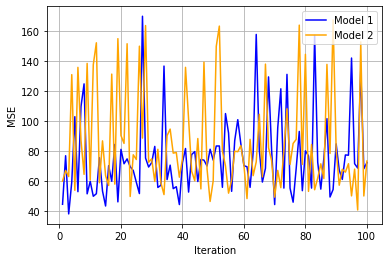

In [21]:
import matplotlib.pyplot as plt

x = [i for i in range(1, 101)]
plt.plot(x, md1results, color = 'blue')
plt.plot(x, md2results, color = 'orange')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend(loc = 'upper right', labels = ['Model 1', 'Model 2'])
plt.grid()
plt.show();

In [ ]:
# after running the loop 100 times we can see that on average model 1 has a lower MSE score than model 2, this means that we would prefer model 1, because it performs better.